# Movie Rating Prediction
Building a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score

## Reading Dataset

In [2]:
data = pd.read_csv("IMDb Movies India2.csv")
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


### The Data Summary

In [3]:
print(data.shape)
data.info()

(15509, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


## Data Preprocessing

In [5]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data.duplicated().sum()

6

In [7]:
msd = pd.DataFrame({'Missing Values':data.isna().sum().values, 'Percentage':((data.isna().sum()/len(data))*100)})
msd

,Missing Values,Percentage
Name,0,0.000000
Year,528,3.404475
Duration,8269,53.317429
Genre,1877,12.102650
Rating,7590,48.939326
Votes,7589,48.932878
Director,525,3.385131
Actor 1,1617,10.426204
Actor 2,2384,15.371720
Actor 3,3144,20.272100


In [8]:
df = data.drop(['Name','Year','Actor 3'],axis='columns')
df.isnull().sum()

Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
dtype: int64

In [9]:
df.head()

,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal
1,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
4,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta


In [10]:
df['Rating'] = df['Rating'].fillna(method='bfill')
df['Genre'] = df['Genre'].fillna(method='bfill')
df['Votes'] = df['Votes'].fillna(method='bfill')
df['Director'] = df['Director'].fillna(method='ffill')
df['Actor 1'] = df['Actor 1'].fillna(method='ffill')
df['Actor 2'] = df['Actor 2'].fillna(method='bfill')
df['Duration'] = df['Duration'].fillna(method='bfill')
df.head()

,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,109 min,Drama,7.0,8,J.S. Randhawa,Manmauji,Birbal
1,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,90 min,"Drama, Musical",4.4,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
4,105 min,Drama,4.7,827,Amol Palekar,Rajat Kapoor,Rituparna Sengupta


In [11]:
lbl = LabelEncoder()
df['genre'] = lbl.fit_transform(df['Genre'])
df['rating'] = lbl.fit_transform(df['Rating'])
df['votes'] = lbl.fit_transform(df['Votes'])
df['direc'] = lbl.fit_transform(df['Director'])
df['actor'] = lbl.fit_transform(df['Actor 1'])
df['actor2'] = lbl.fit_transform(df['Actor 1'])
df['Duration'] = lbl.fit_transform(df['Duration'])
df

,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,genre,rating,votes,direc,actor,actor2
0,9,Drama,7.0,8,J.S. Randhawa,Manmauji,Birbal,299,56,1849,1926,2250,2250
1,9,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,299,56,1849,1549,3280,3280
2,172,"Drama, Musical",4.4,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,351,30,1170,5123,3713,3713
3,10,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,228,30,1170,3319,2917,2917
4,5,Drama,4.7,827,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,299,33,1898,385,3112,3112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,29,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,0,32,375,2690,2586,2586
15505,29,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,40,31,1687,2499,227,227
15506,30,Action,6.2,20,Kiran Thej,Sangeeta Tiwari,Jaya Prada,0,48,796,2424,3609,3609
15507,30,Action,6.2,20,Kiran Thej,Sangeeta Tiwari,Jaya Prada,0,48,796,2424,3609,3609


In [12]:
df1 = df.drop(['Genre','Rating','Votes','Director','Actor 1','Actor 2'],axis='columns')
df1.head()

,Duration,genre,rating,votes,direc,actor,actor2
0,9,299,56,1849,1926,2250,2250
1,9,299,56,1849,1549,3280,3280
2,172,351,30,1170,5123,3713,3713
3,10,228,30,1170,3319,2917,2917
4,5,299,33,1898,385,3112,3112


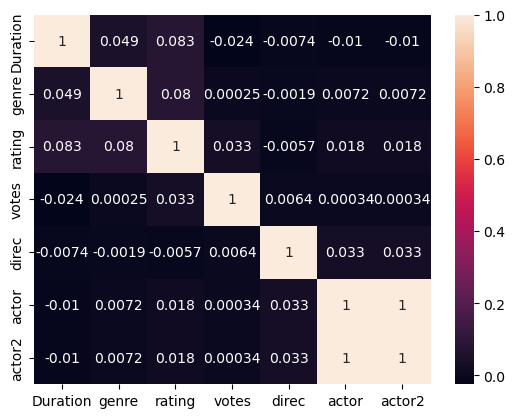

In [13]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [14]:
features = ['Duration','genre','votes','actor','actor2']
target = 'rating'
x = df1[features]
y = df1[target]

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(11631, 5)
(11631,)
(3878, 5)
(3878,)


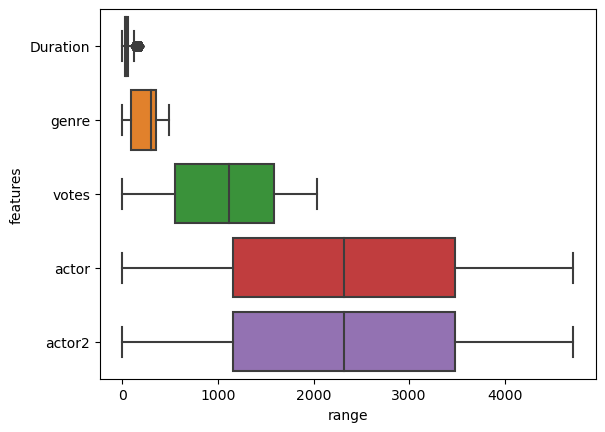

In [16]:
sns.boxplot(data=xtrain,orient='h').set(xlabel='range',ylabel='features')
plt.show()

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(xtrain)
x_test = scaler.fit_transform(xtest)

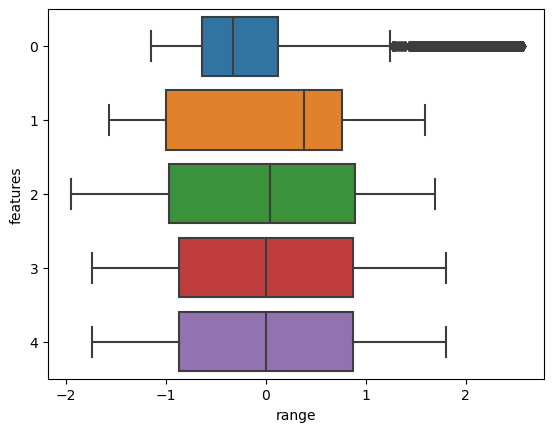

In [18]:
sns.boxplot(data=x_train,orient='h').set(xlabel='range',ylabel='features')
plt.show()

## Handeling outliers

In [19]:
df1['zscore'] = ((df1['Duration'] - df['Duration'].mean())/df['Duration'].std())
llimit = df1['Duration'].mean() - 3*(df1['Duration'].std())
ulimit = df1['Duration'].mean() + 3*(df['Duration'].std())
print("Lower limit:",llimit,"Upper Limit:",ulimit)
#df['zscore'].describe()
ndf = df1[(df1['zscore']<-3) | (df1['zscore']>3)]
ndf

Lower limit: -90.34681729824234 Upper Limit: 203.01520339663682


,Duration,genre,rating,votes,direc,actor,actor2,zscore


calculating outliers with z score because if we use interquartile region method then there will be huge impact on data values. So discarding the interquartile region method

## Model Training Trials
In this we are trying a couple of models to compare the results at the default hyper paramenters of models

In [20]:
#using linear regression SKM
model1 = LinearRegression()
model1.fit(x_train,ytrain)
tr_pred = model1.predict(x_train)
pred = model1.predict(x_test)

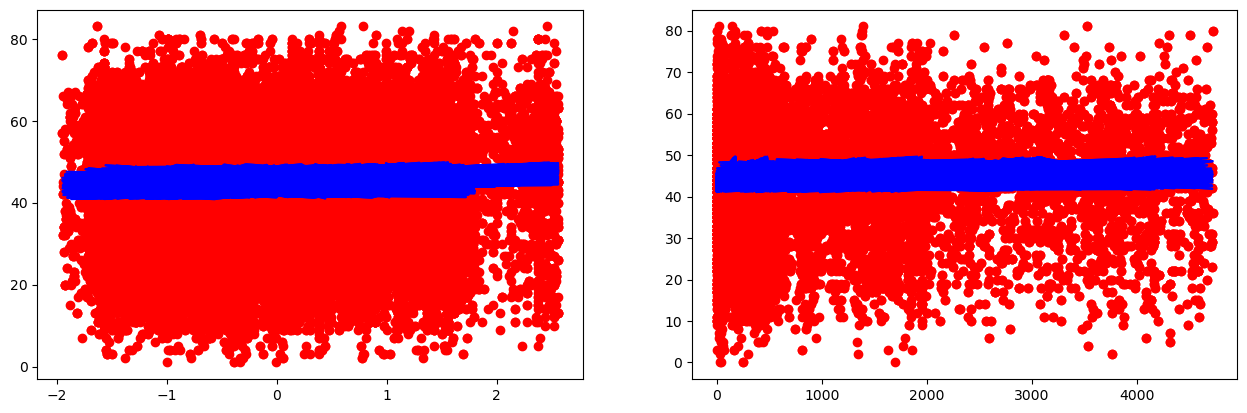

In [21]:
plt.subplot(121)
plt.plot(x_train,ytrain,'ro')
plt.plot(x_train,tr_pred,'b')
plt.subplot(122)
plt.plot(xtest,ytest,'ro')
plt.plot(xtest,pred,'b')
plt.subplots_adjust(right=2)
plt.show()

In [22]:
#result verification
print('Mean Absolute Error for training',mean_absolute_error(tr_pred,ytrain))
print('Mean Absolute Error for testing',mean_absolute_error(pred,ytest))

Mean Absolute Error for training 11.076941146062433
Mean Absolute Error for testing 10.942675084757601


In [23]:
#Using SGD Regressor Model
model2 = SGDRegressor()
model2.fit(x_train,ytrain)
tr2_pred = model2.predict(x_train)
pred2 = model2.predict(x_test)

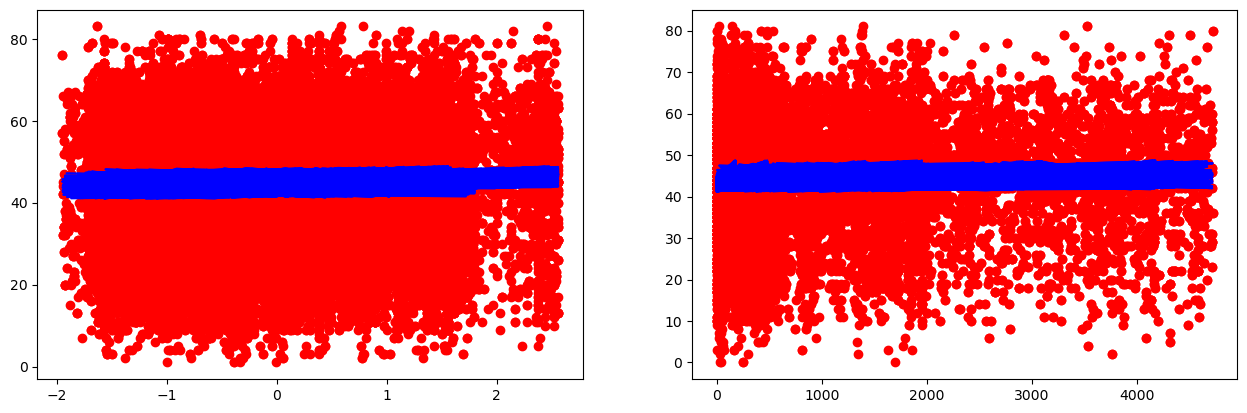

In [24]:
plt.subplot(121)
plt.plot(x_train,ytrain,'ro')
plt.plot(x_train,tr2_pred,'b')
plt.subplot(122)
plt.plot(xtest,ytest,'ro')
plt.plot(xtest,pred2,'b')
plt.subplots_adjust(right=2)
plt.show()

In [25]:
#result verification
print('Mean Absolute Error for training',mean_absolute_error(tr2_pred,ytrain))
print('Mean Absolute Error for testing',mean_absolute_error(pred2,ytest))

Mean Absolute Error for training 11.105244746631914
Mean Absolute Error for testing 10.96780635425751


In [29]:
#Using Logistic Regression
model3 = LogisticRegression()
model3.fit(x_train,ytrain)
tr3_pred = model3.predict(x_train)
pred3 = model3.predict(x_test)

C:\Users\DELL\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


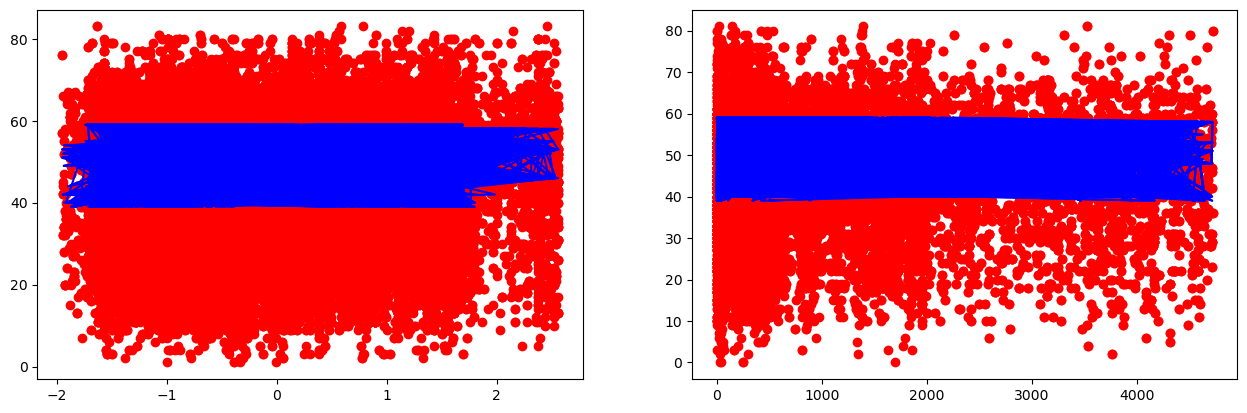

In [27]:
plt.subplot(121)
plt.plot(x_train,ytrain,'ro')
plt.plot(x_train,tr3_pred,'b')
plt.subplot(122)
plt.plot(xtest,ytest,'ro')
plt.plot(xtest,pred3,'b')
plt.subplots_adjust(right=2)
plt.show()

In [28]:
#result varification
print('confusion matrix for training')
print(confusion_matrix(ytrain,tr3_pred))
print('confusion matrix for testing')
print(confusion_matrix(ytest,pred3))

confusion matrix for training
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
confusion matrix for testing
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
